## Author: Ranjan Mukesh Borkar

# Task 1
## Linear Regression using Scikit Learn
**We are given a dataset which has a total of 25 rows and 2 columns mapping the hours studied to the scores obtained by a student. The feature here is the Hours studied and the target value to be predicted is the Score obtained.**

### Importing libraries, Reading the dataset and splitting the dataset to better suit our model.
In this section we will:
1.  Import libraries which we will use to perform the analysis.
2.  Read the data set into a dataframe object to allow for better handling of data.
3.  Visualize our dataset
4.  Split the data into training and test sets.

In [1]:
#Importing the required libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("student_scores.csv")
print(f'The size of dataset is: {dataset.shape[0]} rows * {dataset.shape[1]} columns')
#Let us see the first five entries in our dataframe dataset
display(dataset.head())

The size of dataset is: 25 rows * 2 columns


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Preparation

Let us make a feature array X which, for this dataset, is simply the column "Hours".

In [3]:
X = dataset.iloc[:,0].values.reshape((dataset.shape[0],1))
display(X)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Now we make the label vector y which our target to predict

In [4]:
y = dataset.iloc[:,-1].values
display(y)

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Data Visualization

Text(0, 0.5, 'Scores')

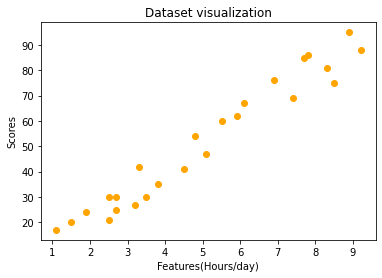

In [5]:
plt.scatter(X,y, color = 'orange')
plt.title("Dataset visualization")
plt.xlabel("Features(Hours/day)")
plt.ylabel("Scores")

We can see that a straight line can fit these datapoints well and hence we conclude that Linear Regression will be a good choice for this dataset.

In [6]:
#We split our data into training and test set to evaluate the performance of our model on the test set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

Note: If we do not have much data, as in this case, it is advisable to not split the data and just train the model using all of our data to make sure our model has the most diversity as possible. We split our data here to show how we can evaluate our model and since out data points are not so widely spaced this shouldn't affect our predictin much.

## Training our model
Here we will train our model on the training set. 

We import Linear Regression from the library sklearn and make an object by the name model and train this on X_train and y_train.

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Plotting
Here we plot our model prediction with the correct labels to see how well our model is fitting to the given dataset.

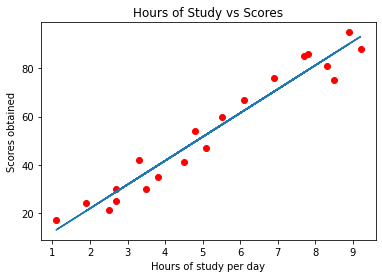

In [8]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,model.predict(X_train))
plt.title("Hours of Study vs Scores")
plt.xlabel("Hours of study per day")
plt.ylabel("Scores obtained")
plt.show()

We see that our Regression line fits quite satisfactorily to the training set of our dataset. We can note here that our model is predicting that as the number of hours of study increase, scores obtained increases on an average. However, looking at the true labels one can tell that's not completely true.

So, what about the test set?
Let us plot our model predicitons on the test set and the true labels.

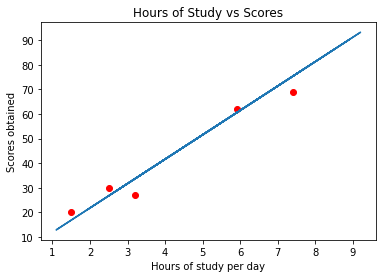

In [9]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,model.predict(X_train))
plt.title("Hours of Study vs Scores")
plt.xlabel("Hours of study per day")
plt.ylabel("Scores obtained")
plt.show()

We see that our Regression line is indeed a good fit for the test data as well. 

Let us see the predictions and labels side by side.

In [10]:
predictions_train = model.predict(X_train).reshape(y_train.shape[0],1)
labels_train = y_train.reshape(y_train.shape[0],1)
df = pd.DataFrame(np.concatenate((predictions_train, labels_train), axis = -1), columns = ["Predictions", "Labels"])
print("Predictions vs labels for training set:")
display(df)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("The mean squared error for the training set is: {}".format(mean_squared_error(labels_train,predictions_train)))
print("The mean absolute error for the training set is: {}".format(mean_absolute_error(labels_train,predictions_train)))

Predictions vs labels for training set:


,Predictions,Labels
0,39.678655,35.0
1,20.848407,24.0
2,79.321281,86.0
3,70.401690,76.0
4,12.919882,17.0
5,52.562508,47.0
6,78.330215,85.0
7,34.723326,42.0
8,84.276609,81.0
9,93.196200,88.0


The mean squared error for the training set is: 30.89818237731452
The mean absolute error for the training set is: 5.186601709180368


In [11]:
predictions_test = model.predict(X_test).reshape(y_test.shape[0],1)
labels_test = y_test.reshape(y_test.shape[0],1)
df = pd.DataFrame(np.concatenate((predictions_test, labels_test), axis = -1), columns = ["Predictions", "Labels"])
print("Predictions vs labels for test set: ")
display(df)
print("The mean squared error for the test set is: {}".format(mean_squared_error(labels_test,predictions_test)))
print("The mean absolute error for the test set is: {}".format(mean_absolute_error(labels_test,predictions_test)))

Predictions vs labels for test set: 


,Predictions,Labels
0,16.884145,20.0
1,33.732261,27.0
2,75.357018,69.0
3,26.794801,30.0
4,60.491033,62.0


The mean squared error for the test set is: 21.5987693072174
The mean absolute error for the test set is: 4.183859899002975


We used mean squared error and mean absolute error for comparison and our values are decent to be acceptable. These metrics are sufficient to evaluate our model but r2_score is a more reliable metric for regression models so we will use that in the following cells. r2_score is more concerned with the how the model fits rather than simply measuring how much our predictions deviate/vary.

## Evaluation of Model
We evaluate our model using r2_score. We can also use mean_squared_error for this dataset. But r2_score is usually preferred choice for regression models. 
Note: The closer the r2_score of our model is to 1 the better our model is performing. 

In [12]:
from sklearn.metrics import r2_score
r2_score(y_train, model.predict(X_train))

0.9515510725211552

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.9454906892105356

We see our model has a r2_score of 0.95 on the training set and of 0.94 on the test set. This performance is satisfactory for our use so we proceed to the next step of Prediction.

## Prediction
For this task we are supposed to predict the score for a student who has studied for 9.25 hours/day

In [14]:
hours = 9.25
print("The predicted label, that is the score for a student with {} hours per day of studying is {:.2f}.".format(hours,float(model.predict([[hours]]))))

The predicted label, that is the score for a student with 9.25 hours per day of studying is 93.69.


So, we get a required predicted score of **93.69** for a student who studies for 9.25 hours/day.

## This concludes our analysis for this task.
### Important Links: 
[GitHub](https://github.com/xxrocripxx/TheSparksFoundation)
[YouTube](https://www.youtube.com/channel/UCoFutkgRXGpHbZm8VnJp69Q)
[LinkedIn](https://www.linkedin.com/in/ranjan-borkar-88782215b/)